## Water Quality Parameter Prediction: Chlorophyll a 

This notebook will be used to implement code to predict the Chlorophyll a water quality parameter based on spectral data from AquaSat. 

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Import necessary libraries and frameworks: 

In [1]:
from __future__ import absolute_import, division, print_function 

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns  

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

#### Import dataset: 

In [2]:
dataframe = pd.read_csv("sr_wq_rs_join.csv", header=0)

In [3]:
dataframe.tail()

,system:index,SiteID,blue,blue_sd,date_unity,green,green_sd,nir,nir_sd,path,...,long,TZID,date_utc,clouds,time,landsat_id,timediff,pwater,type,id
603427,11,USGS-15565447,8266.0,896.663753,2011-03-15T03:50:00Z,8550.0,846.308996,7984.000000,651.276580,78,...,-162.882936,UTC,2011-03-15T03:50:00Z,0.00,2011-03-16T22:03:00Z,LE07_L1TP_078017_20110316_20160913_01_T1,-42.216702,99.0,Stream,New
603428,13,USGS-15565447,4940.5,880.403731,2016-04-05T22:10:00Z,5058.0,834.378816,3540.333333,566.666360,78,...,-162.882936,UTC,2016-04-05T22:10:00Z,47.88,2016-04-06T22:09:04Z,LC08_L1TP_078017_20160406_20170223_01_T1,-23.984557,99.0,Stream,New
603429,16,USGS-15565447,874.0,29.199011,2009-08-18T22:30:00Z,1182.0,24.913294,969.000000,42.492823,78,...,-162.882936,UTC,2009-08-18T22:30:00Z,25.00,2009-08-17T21:59:36Z,LE07_L1TP_078017_20090817_20160917_01_T1,24.506503,99.0,Stream,New
603430,17,USGS-15565447,6449.0,795.585175,2014-04-10T01:10:00Z,6854.0,862.618506,6666.000000,856.343391,78,...,-162.882936,UTC,2014-04-10T01:10:00Z,0.00,2014-04-09T22:06:26Z,LE07_L1TP_078017_20140409_20160906_01_T1,3.059437,99.0,Stream,New
603431,18,USGS-15565447,448.0,27.653250,2018-05-23T12:00:00Z,668.0,27.723633,624.000000,48.881346,78,...,-162.882936,America/Nome,2018-05-23T20:00:00Z,28.00,2018-05-22T22:09:32Z,LE07_L1TP_078017_20180522_20180618_01_T1,21.840960,99.0,Stream,New


Create new dataset consisting of only the multipsectrral parameters and the respective water quality parameter that is to be predicted: chlorophyll a  

In [4]:
dataset = dataframe.drop(['date', 'endtime', 'type', 'sat', 'clouds', 'pwater', 'id', 'system:index', 'SiteID', 'pixelCount', 'date_unity', 'path', 'date_only', 'row', '.geo', 'doc', 'p_sand', 'secchi', 'tis', 'tss', 'source', 'lat', 'long', 'TZID', 'date_utc', 'time', 'landsat_id', 'timediff'], axis=1)

In [5]:
dataset

,blue,blue_sd,green,green_sd,nir,nir_sd,qa,qa_sd,red,red_sd,swir1,swir1_sd,swir2,swir2_sd,chl_a
0,230.00000,25.890351,243.000000,22.781871,383.000000,30.704239,68.0,0.996212,215.000000,25.712257,228.000000,23.162754,172.000000,29.016722,3.1
1,200.00000,23.917018,212.000000,23.645332,242.000000,23.730330,68.0,0.000000,130.000000,15.837450,28.000000,25.230477,16.000000,32.829652,NaN
2,543.00000,31.119580,495.000000,31.446904,639.000000,33.756642,66.0,0.335532,392.000000,24.107920,248.000000,39.162748,186.000000,44.252996,NaN
3,269.00000,31.265990,270.000000,32.082510,364.470719,56.942639,68.0,0.649123,220.000000,34.860829,149.000000,45.100911,86.000000,36.467172,NaN
4,146.00000,18.720043,137.000000,33.139252,212.000000,17.413788,68.0,0.600000,97.000000,20.053927,63.000000,18.607525,21.000000,28.032838,NaN
5,369.00000,24.941864,414.000000,28.241989,651.000000,31.131976,66.0,0.000000,367.000000,19.086034,247.000000,37.067018,155.000000,33.617935,NaN
6,178.00000,21.693602,198.000000,26.788490,241.000000,15.055541,68.0,0.257093,114.000000,21.454662,39.000000,22.324345,22.000000,33.657104,NaN
7,158.00000,17.666516,155.000000,16.174155,148.000000,31.351048,68.0,0.000000,79.000000,18.455752,54.000000,19.087639,16.000000,26.740895,NaN
8,258.00000,44.997962,282.000000,45.683684,340.000000,29.398323,68.0,0.360464,237.000000,48.237231,193.000000,41.610756,157.000000,42.165428,NaN
9,201.00000,19.816958,231.000000,29.204494,254.000000,28.729644,68.0,0.000000,145.000000,19.452538,60.000000,27.386876,18.000000,34.496059,NaN


#### identify and delete rows with missing parameter: 

In [6]:
dataset.isna().sum()

blue             0
blue_sd       5254
green            0
green_sd      5254
nir              0
nir_sd        5254
qa               0
qa_sd         5254
red              0
red_sd        5254
swir1            0
swir1_sd      5254
swir2            0
swir2_sd      5254
chl_a       383240
dtype: int64

In [7]:
dataset = dataset.dropna()

In [8]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [9]:
train_stats = train_dataset.describe()
train_stats.pop("chl_a")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
blue,174746.0,403.746099,754.922174,-2000.0,244.000000,330.000000,454.000000,20000.000000
blue_sd,174746.0,39.703306,209.343307,0.0,21.227205,25.769654,34.179159,9022.731851
green,174746.0,479.463993,582.109534,-1433.0,292.000000,413.000000,572.000000,20000.000000
green_sd,174746.0,40.802347,127.125690,0.0,20.507316,26.937178,39.979358,8540.353941
nir,174746.0,406.726745,482.273466,-1438.0,218.182907,322.000000,493.000000,20000.000000
nir_sd,174746.0,56.060594,100.417688,0.0,22.791221,34.540213,59.495755,6945.565524
qa,174746.0,88.724915,70.092231,66.0,68.000000,68.000000,68.000000,400.000000
qa_sd,174746.0,0.660280,3.119670,0.0,0.000000,0.000000,0.366971,36.769553
red,174746.0,378.001054,633.349847,-1819.0,204.000000,303.000000,446.000000,20000.000000
red_sd,174746.0,42.299326,140.384844,0.0,20.778232,26.646279,40.829302,8935.323940


In [10]:
train_labels = train_dataset.pop('chl_a')
test_labels = test_dataset.pop('chl_a')

In [11]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [12]:
train_statsnorm = normed_train_data.describe()
train_statsnorm = train_statsnorm.transpose()
train_statsnorm

,count,mean,std,min,25%,50%,75%,max
blue,174746.0,5.508573e-16,1.0,-3.184098,-0.211606,-0.097687,0.066568,25.957979
blue_sd,174746.0,-2.051265e-15,1.0,-0.189656,-0.088257,-0.066559,-0.026388,42.910512
green,174746.0,3.733171e-15,1.0,-3.285402,-0.322042,-0.114178,0.158967,33.534129
green_sd,174746.0,-4.735759e-15,1.0,-0.320961,-0.159645,-0.109067,-0.006474,66.859433
nir,174746.0,-1.692922e-15,1.0,-3.825064,-0.390948,-0.175682,0.178889,40.626895
nir_sd,174746.0,-3.807654e-15,1.0,-0.558274,-0.331310,-0.214309,0.034209,68.608480
qa,174746.0,-1.974586e-15,1.0,-0.324214,-0.295681,-0.295681,-0.295681,4.440936
qa_sd,174746.0,-7.451832e-15,1.0,-0.211650,-0.211650,-0.211650,-0.094019,11.574708
red,174746.0,1.456729e-15,1.0,-3.468859,-0.274731,-0.118420,0.107364,30.981296
red_sd,174746.0,-3.170595e-16,1.0,-0.301310,-0.153301,-0.111501,-0.010471,63.347470


In [13]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'), 
    layers.Dense(64, activation='relu'), 
    layers.Dense(64, activation='relu'), 
    layers.Dense(64, activation='relu'), 
    layers.Dense(64, activation='relu'), 
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'), 
    layers.Dense(64, activation='relu'), 
    layers.Dense(1) # Notice that the final layer has no activation since we want to output a single number in this regression task. 
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [14]:
model = build_model() 

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                960       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4

In [16]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[0.00373357],
       [0.00652772],
       [0.00905305],
       [0.00706549],
       [0.00123272],
       [0.0058169 ],
       [0.00659066],
       [0.00200897],
       [0.00550316],
       [0.00215626]], dtype=float32)

In [17]:
EPOCHS = 100 

history = model.fit( 
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,)

In [18]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,144079.389747,20.567719,144079.500000,556121.642358,26.443272,556121.8125,95
96,199502.262184,22.003244,199502.000000,556165.820712,26.194462,556165.7500,96
97,144407.087768,20.783833,144407.265625,556159.899470,25.524441,556160.1250,97
98,144132.703378,20.620518,144132.453125,556114.222013,26.172081,556114.2500,98
99,144428.675560,20.521742,144428.703125,556138.181200,26.229059,556138.2500,99


In [19]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [MPG]')

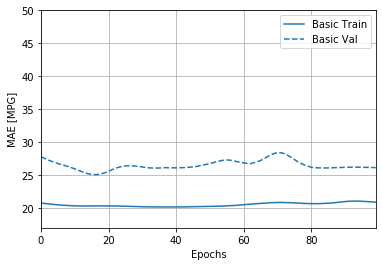

In [33]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([17, 50])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

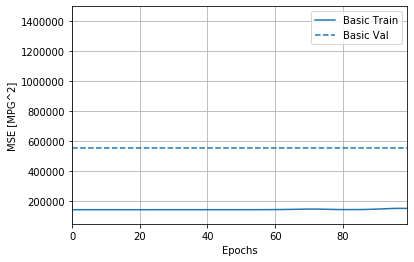

In [38]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([50000, 1500000])
plt.ylabel('MSE [MPG^2]')

### Results: 

Here is the results for the above trained algorithm. 

Make evaluations on the test data with metrics defined: 

#### Metrics: 

In [41]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Test data: Mean Abs Error:")
print(mae)
print("Test data: Mean Sqr Error:") 
print(mse) 

43687/43687 - 1s - loss: 474581.2446 - mae: 25.8830 - mse: 474581.1562
Test data: Mean Abs Error:
25.88301
Test data: Mean Sqr Error:
474581.16


#### Predicted vs. actual value scatter plot: 

The line is of slope and represents perfect fit. If a point is predicted to be on that line, then that is a perfect prediction. 

Thus, the more linear the points plotted, the better the model performed. 

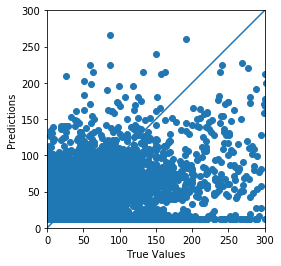

In [44]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 300]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

#### Error distribution histogram: 

A better performing model will have a gaussian or normal bell-shape. 

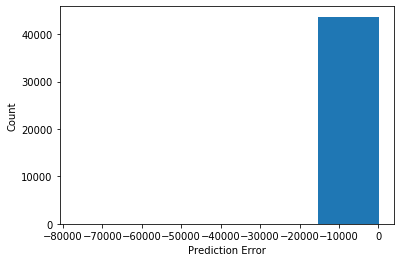

In [49]:
error = test_predictions - test_labels
plt.hist(error, bins = 5)
plt.xlabel("Prediction Error") 
_ = plt.ylabel("Count")